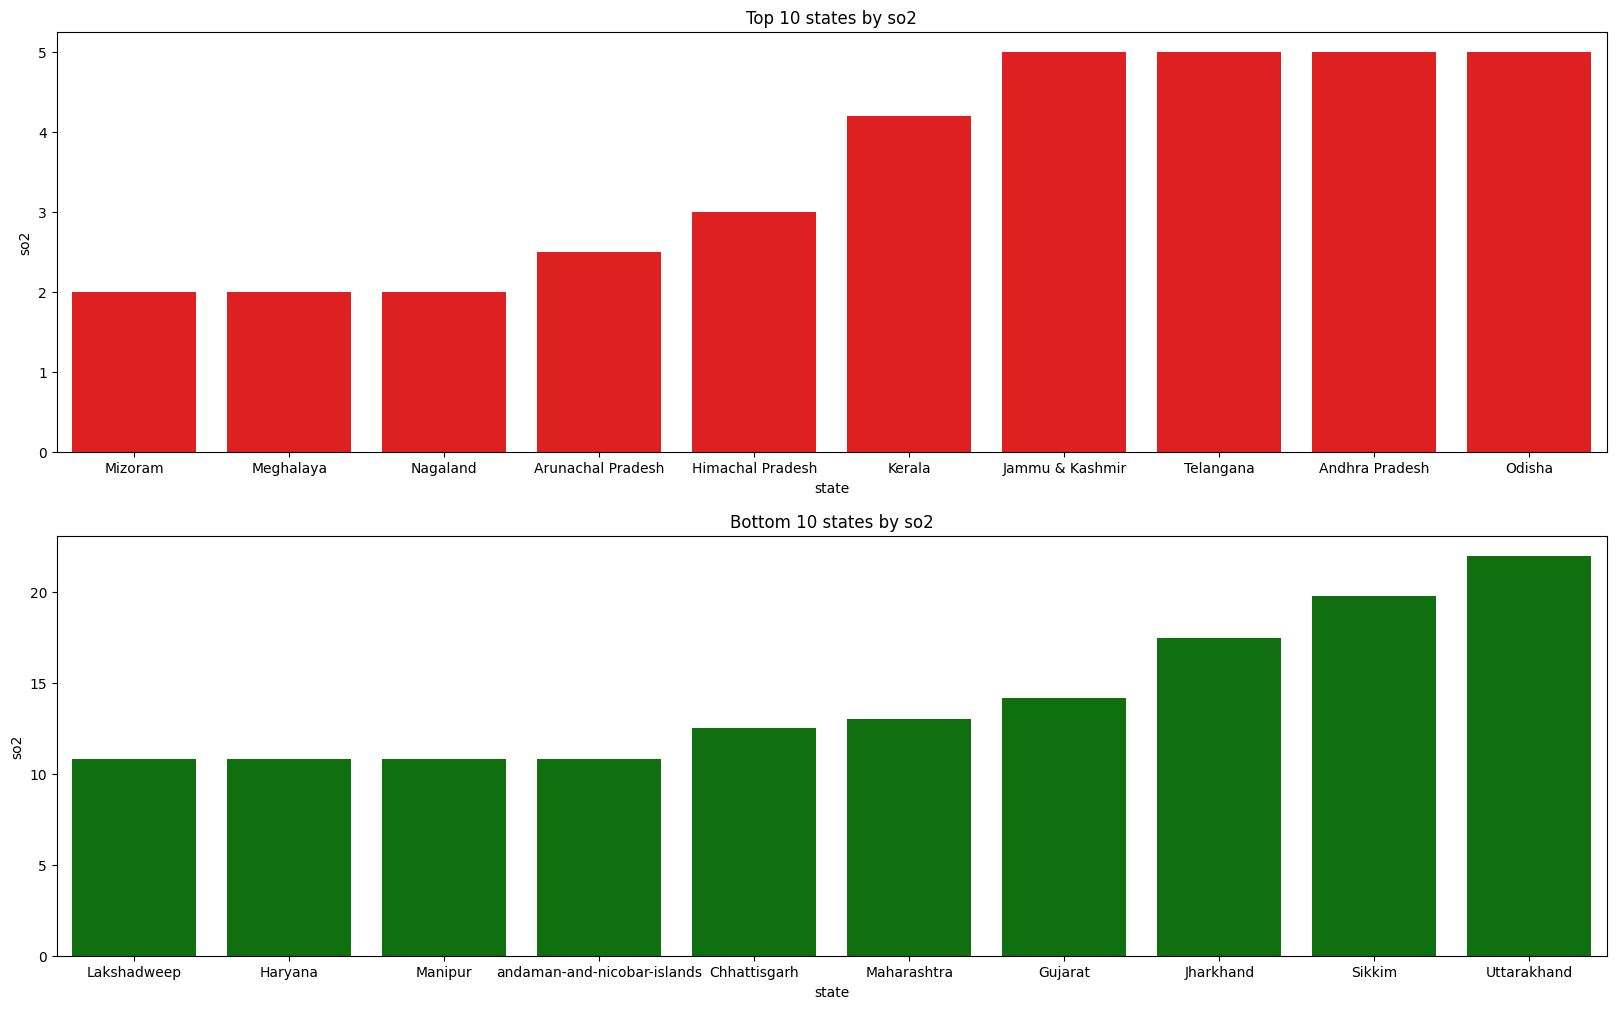

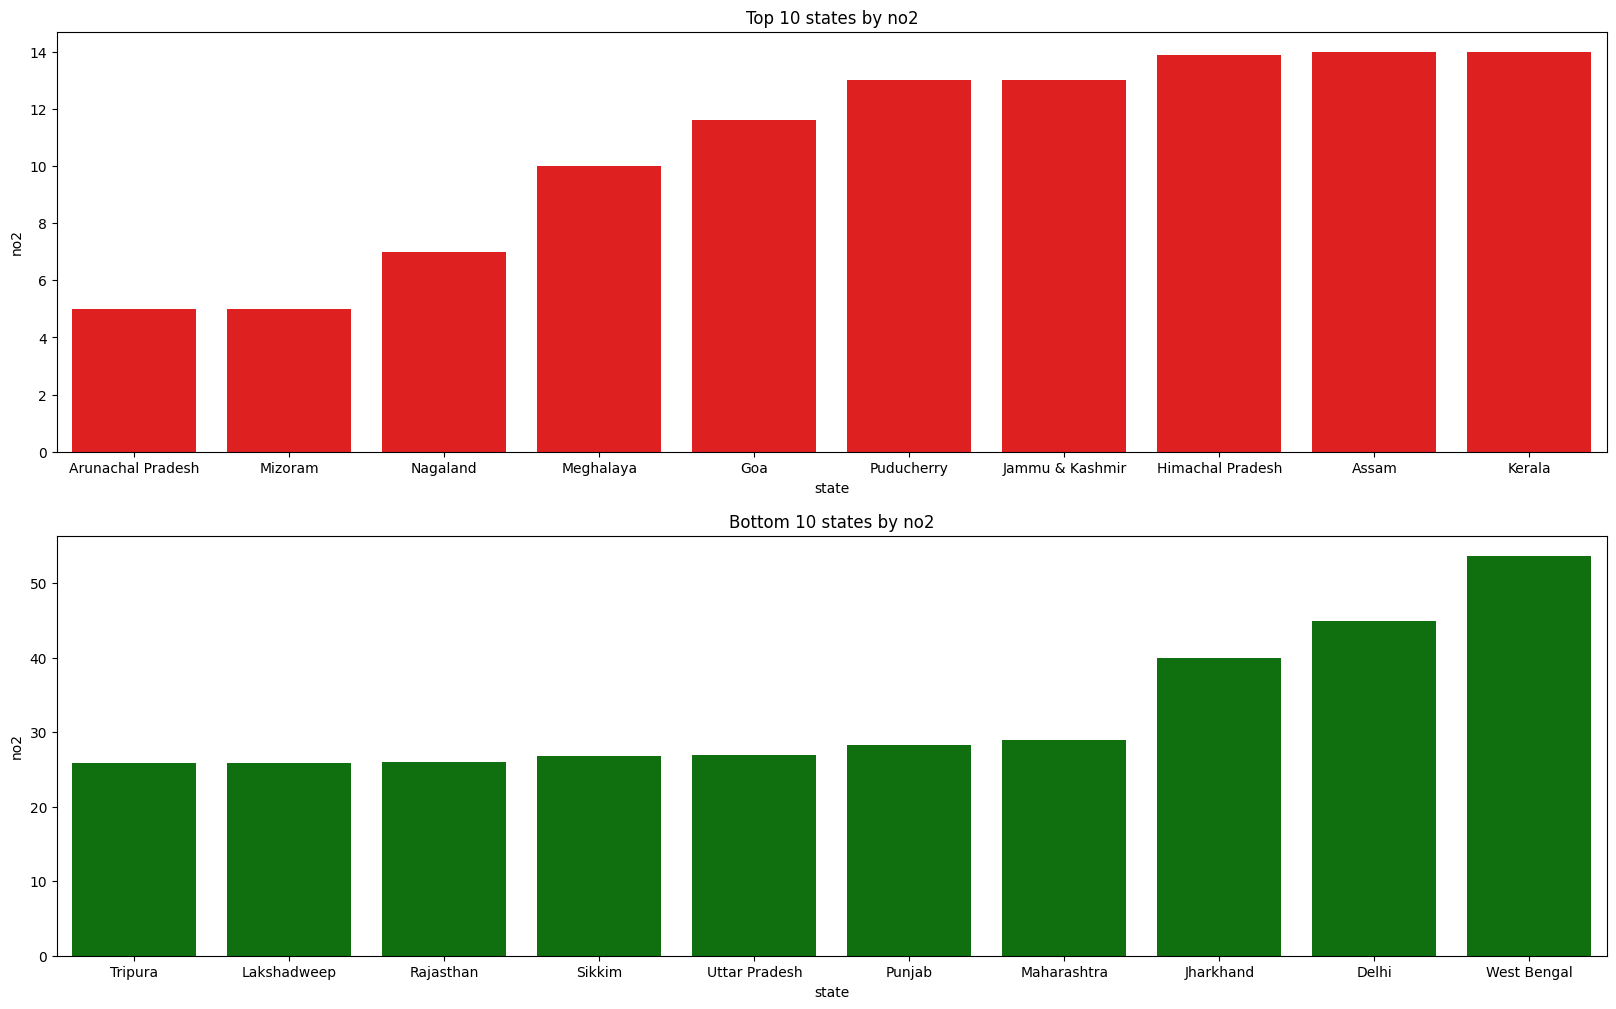

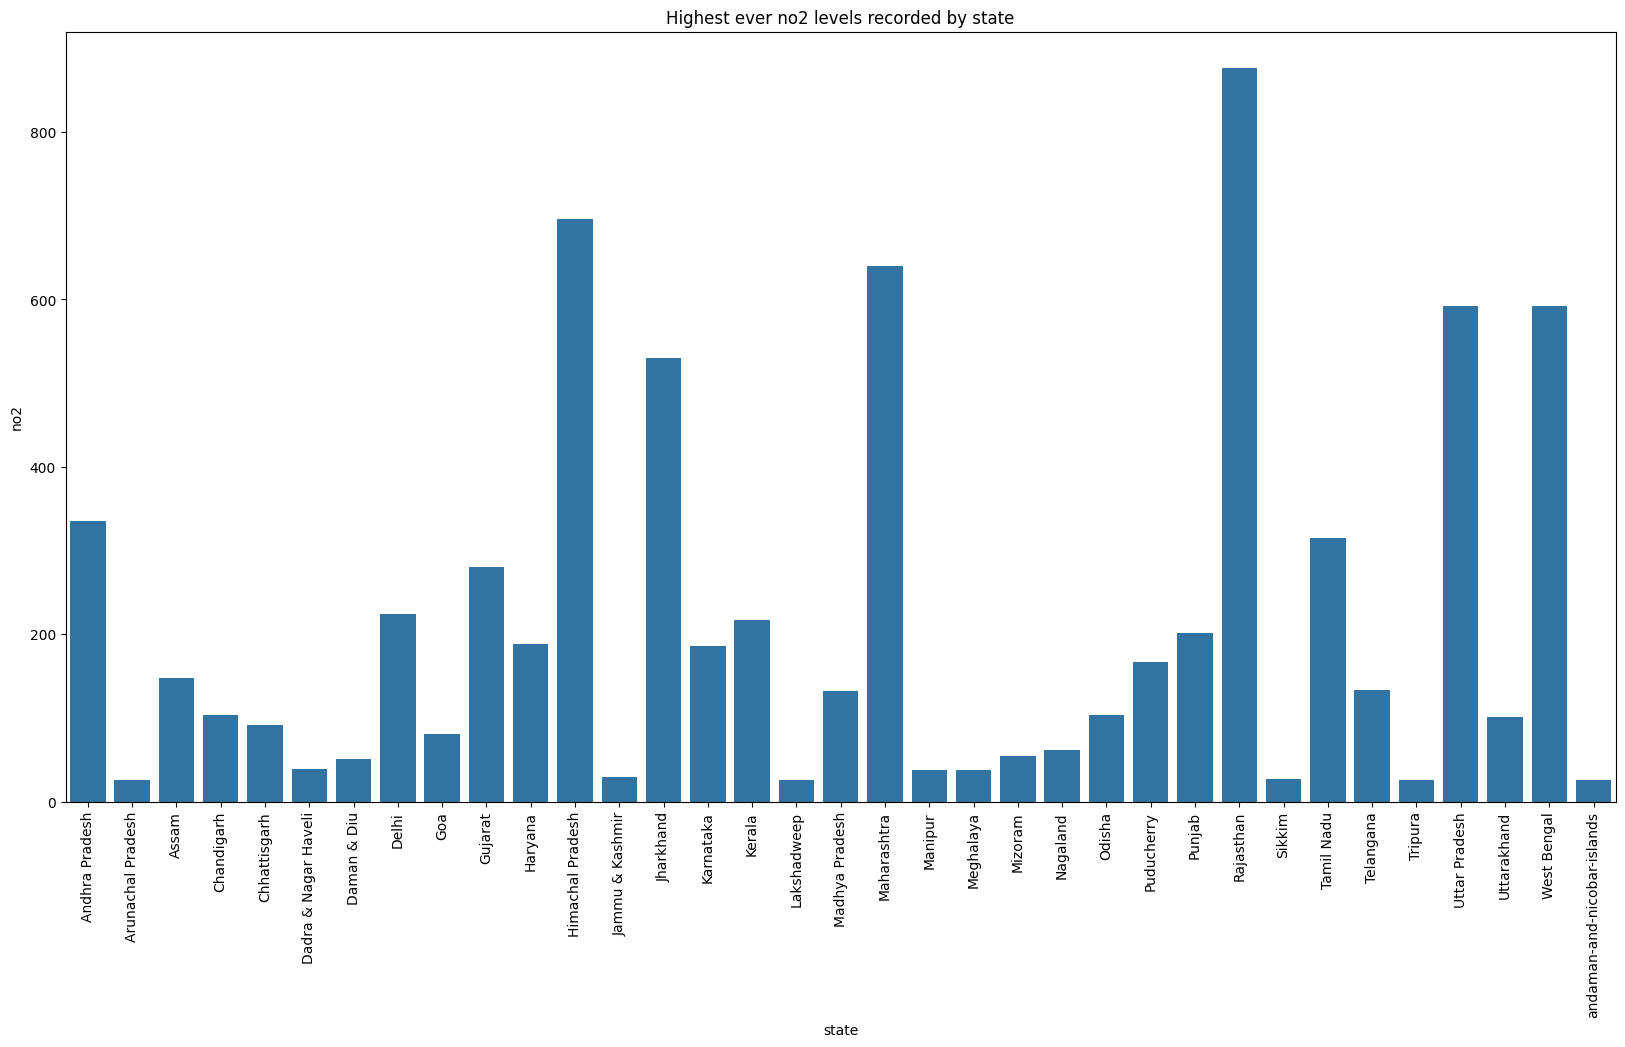

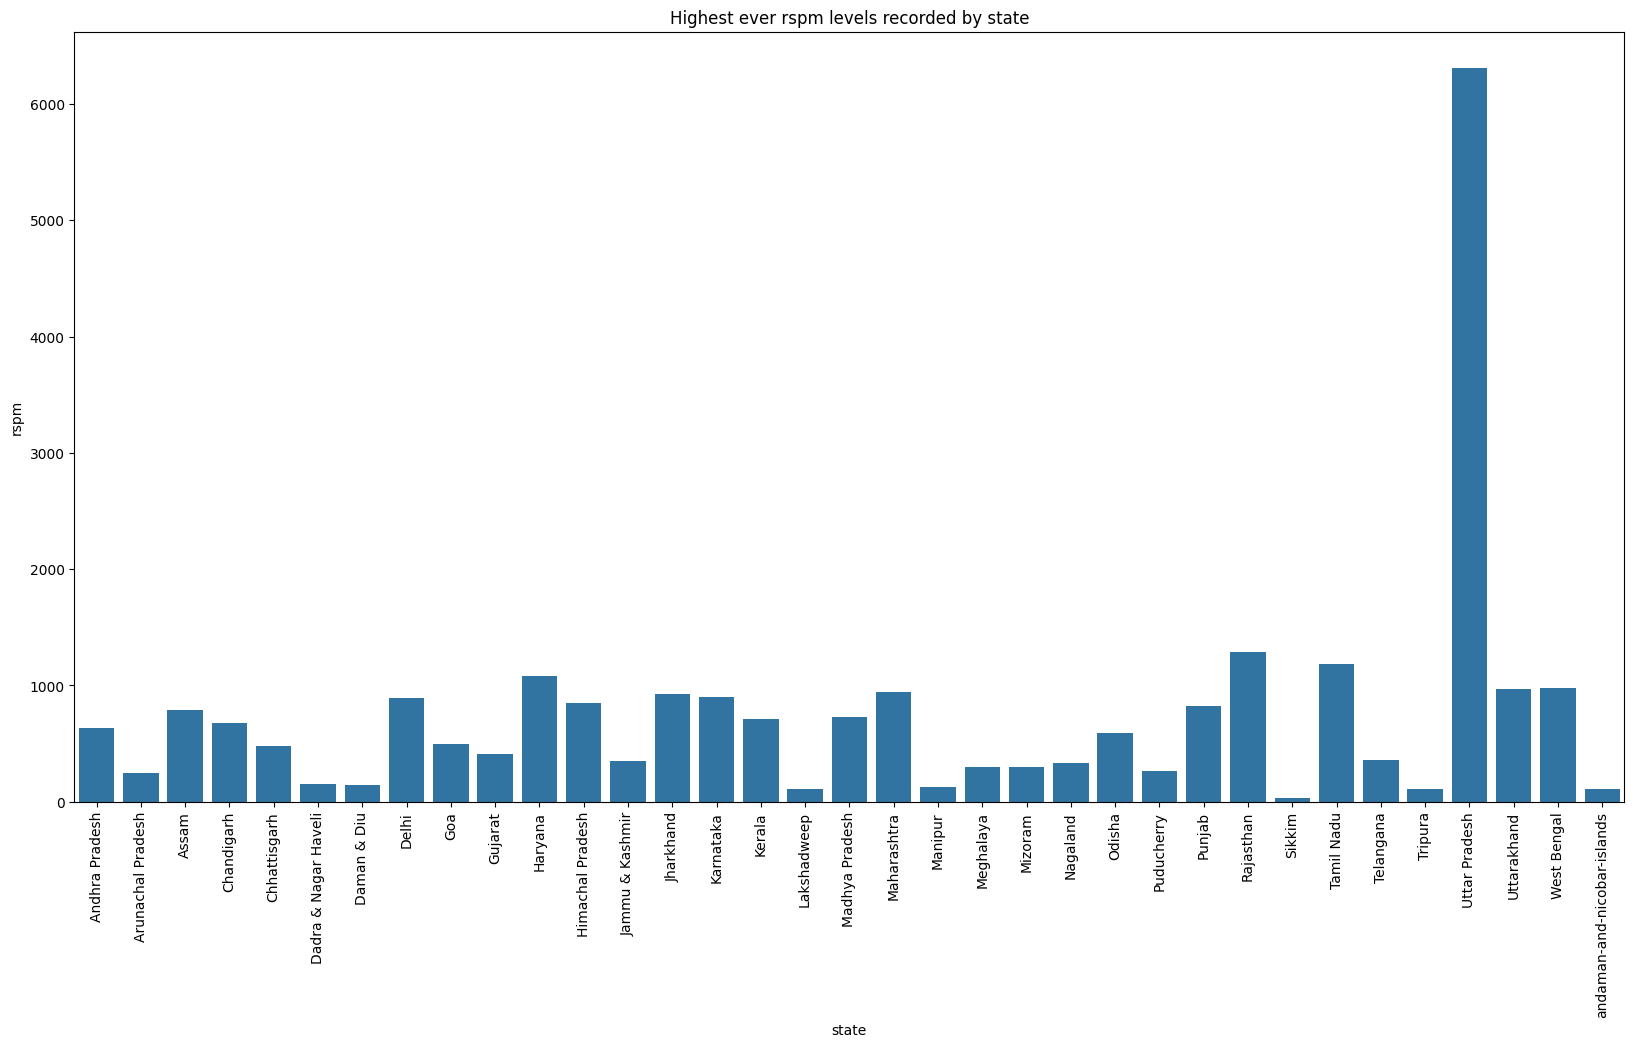

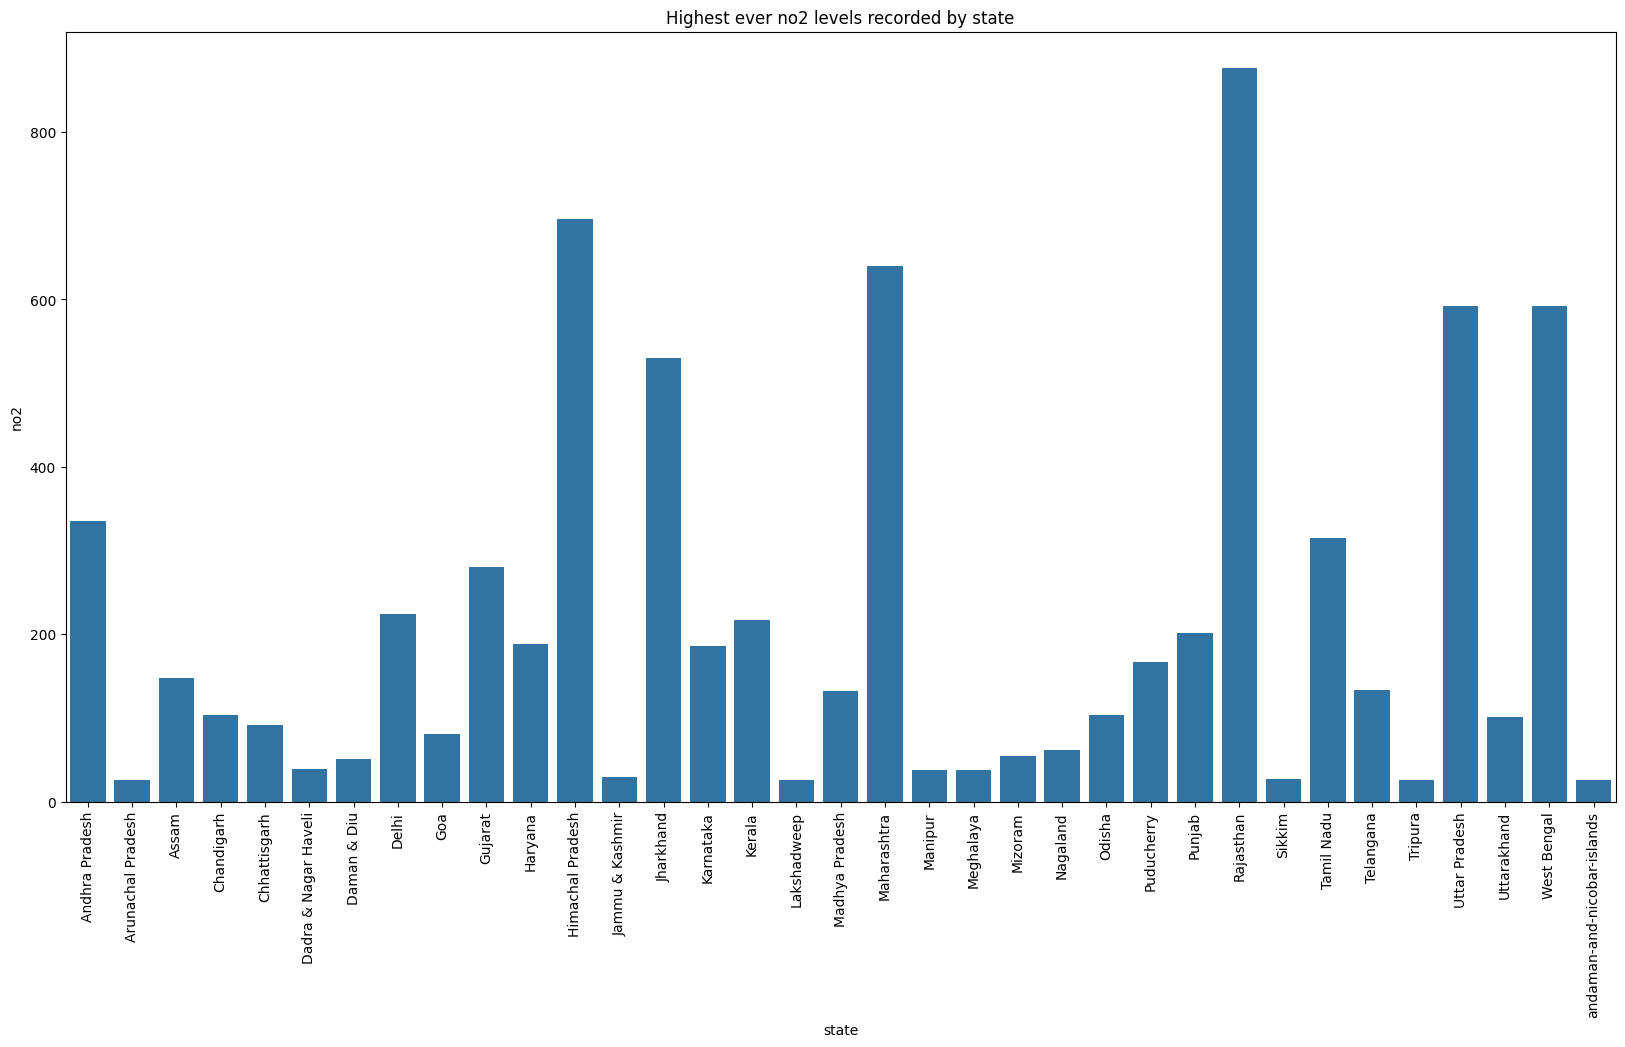

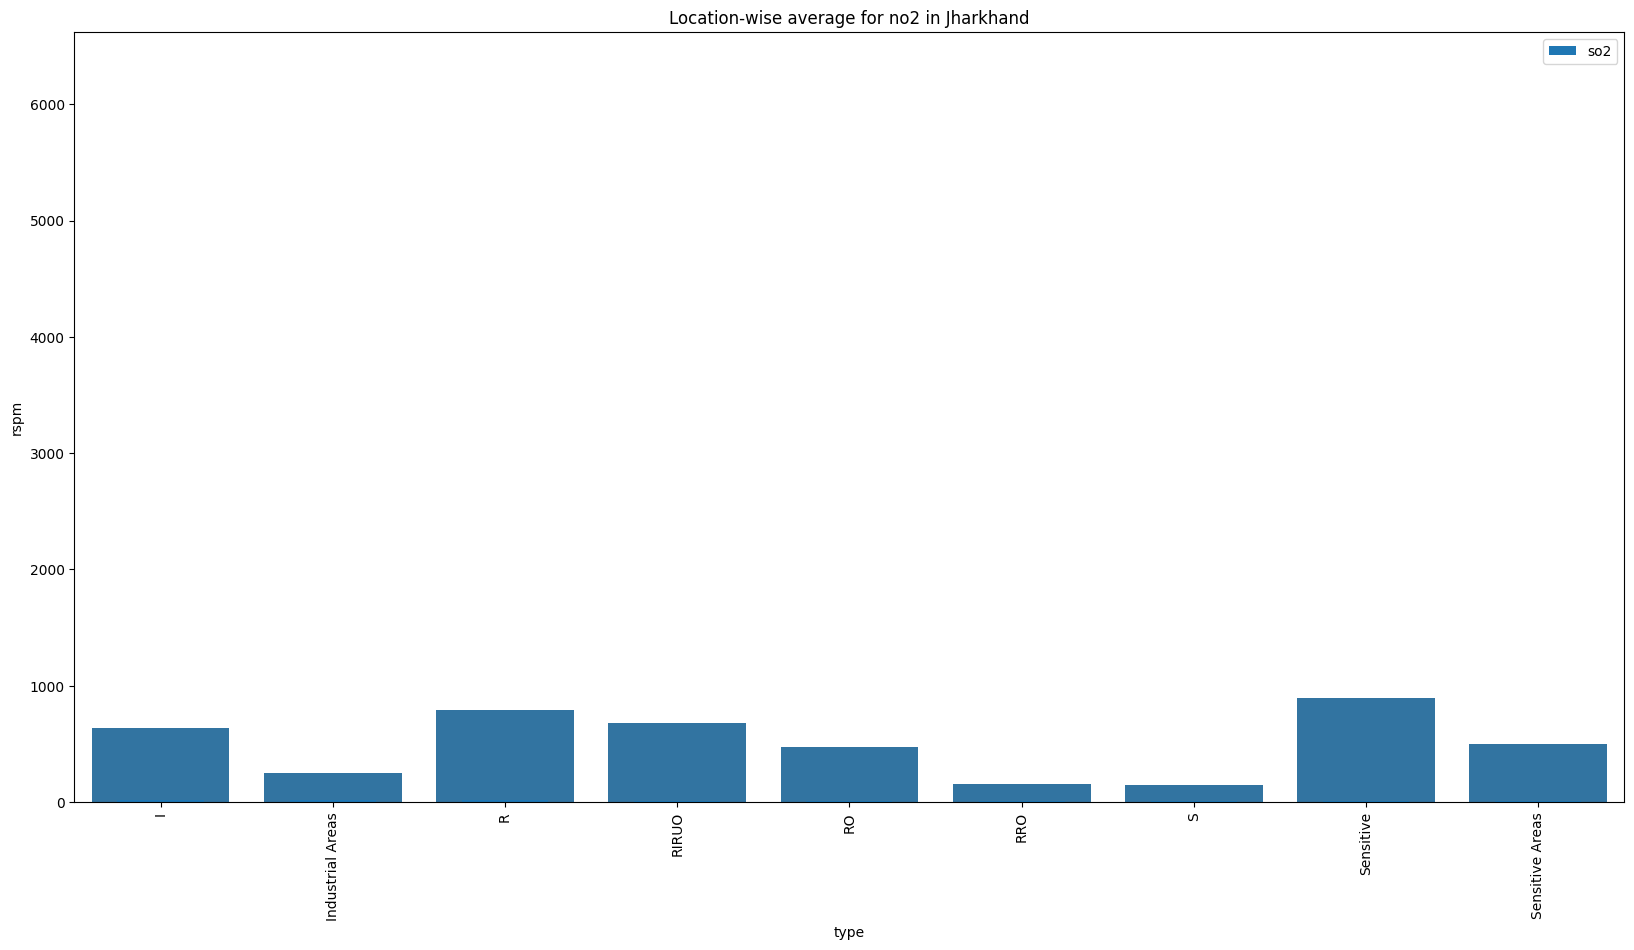

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings('ignore')
data = pd.read_csv("data.csv", encoding="cp1252")
# Clean state and type columns
data.state.replace({'Uttaranchal': 'Uttarakhand', "Bihar": "Jharkhand"}, inplace=True)
data.type.replace({
    "Residential": "R", 
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO", 
    "Industrial Area": "I",
    "Industrial": "I", 
    "Sensitive Area": "S", 
    np.nan: "RRO"
}, inplace=True)

# Impute missing values for specified columns
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']
data[VALUE_COLS] = SimpleImputer(strategy='mean').fit_transform(data[VALUE_COLS])

# Function to plot top and bottom 10 states
def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2, 1, figsize=(20, 12))
    ind = data[[indicator, 'state']].groupby('state').median().sort_values(by=indicator)
    
    sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='red').set_title(f"Top 10 states by {indicator}")
    sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1], color='green').set_title(f"Bottom 10 states by {indicator}")

# Plot for SO2 and NO2
top_and_bottom_10_states("so2")
top_and_bottom_10_states("no2")

# Function to plot highest levels recorded
# Function to plot highest levels recorded
def highest_levels_recorded(indicator="so2"):
    plt.figure(figsize=(20, 10))
    # Select only the numeric columns for aggregation
    ind = data[['state', indicator]].groupby('state', as_index=False).max()
    sns.barplot(x='state', y=indicator, data=ind).set_title(f"Highest ever {indicator} levels recorded by state")
    plt.xticks(rotation=90)

# Plot for NO2 and RSPM
highest_levels_recorded("no2")
highest_levels_recorded("rspm")
# Plot for NO2 and RSPM
highest_levels_recorded("no2")
highest_levels_recorded("rspm")

# Function to plot pollutant averages by type
def type_avg(indicator=""):
    type_avg = data[VALUE_COLS + ['type']].groupby("type").mean()
    (type_avg[indicator] if indicator else type_avg).plot(kind='bar')
    plt.title(f"Pollutant average by type for {indicator if indicator else 'all'}")

type_avg('so2')

# Function to plot location-wise averages
def location_avgs(state, indicator="so2"):
    locs = data[VALUE_COLS + ['state', 'location']].groupby(['state', 'location']).mean().loc[state].reset_index()
    sns.barplot(x='location', y=indicator, data=locs).set_title(f"Location-wise average for {indicator} in {state}")
    plt.xticks(rotation=90)

location_avgs("Jharkhand", "no2")
